JANINE ALI AHAMD - ROMAIN PAUPE DIA6

<div style="background-color:#4682B4; padding:20px; border-radius:5px; text-align:center">
    <h2 style="color:#001f3d; font-size:36px;">Biscuit Factory</h2>
</div>

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Problem Description and its challenges</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Context</h4>
</div>


A biscuit factory is planning to bake a variety of Christmas biscuits. With just **one roll of dough**, the factory plans to make biscuits in different sizes and shapes. 

We have at our disposition a **roll of dough with a length of 500 units**. It **contains defects of three classes** ('a', 'b', 'c') with specific positions.

With this roll of dough, we **want to bake four types of biscuits**. Each type has a **different length, value, and defect threshold**, meaning there is a maximum number of defects allowed per type.

We must find a way to **place the biscuits optimally** along the roll. We can only place as many biscuits of the same type as we need. We must place them **on integer postions** along the roll, and they will occupy space proportional to their length.

Any portion of the roll of dough that goes to **waste results with a penalty** on the profit.

We want to make the most of the dough to produce as many biscuits as possible, all while ensuring the highest profit.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Constraints</h4>
</div>

- Biscuits must be placed on integer position
- Biscuits must not overlap.
- Defect thresholds must be respected for each class within the range of the biscuit's placement.
- The total length of placed biscuits cannot exceed the dough's length.


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Goals</h4>
</div>

**Maximizing the profit of the factory with this single roll of dough**
- Maximize the total value of biscuits on the roll, while respecting the given constraints
- Minimize losses by minimizing wasted dough.

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Problem Implementation</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Variables initialization and dough representation</h4>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Initializing roll of dough</h4>
</div>

**Roll of dough representation**:

We will represent the roll of dough as an array of length 500 (from x=0 to x=499). In each cell, we either have -1 which indicates an empty portion or the Id of the biscuits that occupies it (0,1,2 or 3).  We start with an empty dough.

[insert picture]

In [20]:
Dough_roll = [-1]*500 # This will be done directly in the class

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Initializing Biscuit dictionaries</h4>
</div>

**A list of Dictionaries for Biscuits properties**:
- [dictionary_B0, dictionary_B1, dictionary_B2, dictionary_B3]
- For each dictionary we have:
    - Ids = Biscuit type (0,1,2,3)
    - Length
    - Value
    - Defect_a : defect of type a threshhold
    - Defect_b : defect of type b threshhold
    - Defect_c : defect of type c threshhold

In [23]:
dictionary_B0 = {'id': 0 , 'length' : 4, 'value' : 3, 'Defect_a' : 4, 'Defect_b' : 2, 'Defect_c' : 3}
dictionary_B1 = {'id': 1 , 'length' : 8, 'value' : 12, 'Defect_a' : 5, 'Defect_b' : 4, 'Defect_c' : 4}
dictionary_B2 = {'id': 2 , 'length' : 2, 'value' : 1, 'Defect_a' : 1, 'Defect_b' : 2, 'Defect_c' : 1}
dictionary_B3 = {'id': 3 , 'length' : 5, 'value' : 8, 'Defect_a' : 2, 'Defect_b' : 3, 'Defect_c' : 2}

Biscuits = [dictionary_B0, dictionary_B1, dictionary_B2, dictionary_B3]

In [25]:
#Example of acces: Biscuits[index in list (eq to the id)]['key']
Biscuits[0]['value']

3

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Initializing defects</h4>
</div>

In [28]:
import pandas as pd
Defects = pd.read_csv("defects.csv")
Defects.head()

,x,class
0,355.449335,c
1,92.496236,a
2,141.876795,c
3,431.833902,c
4,435.028461,c


In [30]:
Defects_Sorted = Defects.sort_values('x')
filtered_rows = Defects_Sorted[(Defects_Sorted['x'] > 14) & (Defects_Sorted['x'] < 18)]
print(filtered_rows)

             x class
79   14.469992     a
452  16.082989     c
259  16.759229     a


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Problem Foundation: Implementing the problem into a Class</h4>
</div>


**Biscuit Placement**:
If a biscuit is placed at the integer position x, then it occupies positions x till x+biscuit_length-1. For example, biscuit B1 of size 4 at
position x=2, then it also occupies x=3 or x=4 and x=5. We only place the biscuits if the position is valid (no overlap, the bicsuit does not "go out" of the roll, defects thresholds respected)

**Total Length constraint**:
Instead of computing total length of all biscuits and making sure it doesn't go out of the roll, we just make sure that the "end" of the biscuit is within the bounds of the roll (end position<=499). This makes it faster to check this constraint instead of adding calculations.

**No overlap constraint**:
intuitive implementation. 

**Integer position only constraint**:
This constraint s automatically respected as we directly place the biscuits on integer positions. No need to verify that.  

**defects thresholds constraint**:
We check the number of each defect within the placement range of the biscuit and make sure we respect the threshold. 

**Profit**:
We calculate the sum of the values for each biscuit we placed. We make sure to count the biscuit once (not per cell). We compute the penalty which is  the number of unoccupied cells (representing empty positions and wasted dough). the profit would be the total value - penalty. 

In [33]:
class BiscuitProblem:

    def __init__(self, biscuits = Biscuits, defects = Defects):
        self.dough_roll =[-1] * 500
        self.biscuits = biscuits
        self.defects = defects

    def place_biscuit(self, biscuit_id, position):
        """ Attempt to place a biscuit on the dough roll at the given position.
            If position is valid then biscuit is placed and returns True, else return False"""
        
        biscuit = self.biscuits[biscuit_id] # get the biscuit properties
        start = position #starting position
        end = position + biscuit["length"] - 1 #end position
        
        # Check if placement is valid (all constraints respected)
        if not self.total_length(end) or self.overlap(start, end) or not self.defects_threshold(biscuit, start, end):
            return False

        # If position is valid then we can place the biscuit
        for i in range(start, end + 1):
            self.dough_roll[i] = biscuit_id
        return True
        
    # Constraints verification functions 
        
    def total_length(self, end):
        """ Verify that the biscuit does not exceed the dough roll length. 
            This is the same as making sure the total length of placed biscuits does not exceed the dough's length"""
        return end < len(self.dough_roll)
        
    def overlap(self, start, end):
        """ Check if placing the biscuit would overlap with another biscuit. Checks if positions are empty (== -1).
            If overlaps then return True, else it returns False"""
        return any(self.dough_roll[i] != -1 for i in range(start, end+1))
        
    def defects_threshold(self, biscuit, start, end):
        """ Verify that the defect thresholds are not exceeded. """
        
        segment = self.defects[(self.defects["x"] >= start) & (self.defects["x"] < end)] #get the defects within range
        defect_counts = segment["class"].value_counts().to_dict() # counts defects per type and store in a dictionary 

        # Check if any defect exceeds the allowed threshold
        for defect_type, max_allowed in biscuit.items():
            if defect_type.startswith("Defect_"): # Check only keys that represent defect thresholds
                defect_class = defect_type.split("_")[1].lower() # Get the actual defect class from the key
                actual_defects = defect_counts.get(defect_class, 0) #Count the number of defects of this class in the current segment, 0 if not present
                if actual_defects > max_allowed:# If exceeds the allowed threshold, return False
                    return False
        return True

    def profit(self):
        """ Calculate the total profit from the dough"""
        total_value = 0
        penalty = 0
        position = 0
    
        while position < len(self.dough_roll) :
            biscuit_id = self.dough_roll[position]

            if biscuit_id != -1:
                total_value += self.biscuits[biscuit_id]["value"]
                position += self.biscuits[biscuit_id]["length"]        

            else:
                penalty += 1
                position += 1

        #print(penalty) # debug
        #print(total_value) # debug
        return total_value - penalty

    def display_roll(self):
        """Representation of the dough roll """
        print("Dough Roll:")
        print(" ".join(map(str, self.dough_roll)))

    

In [35]:
# Example 1:
problem = BiscuitProblem()
problem.place_biscuit(0, 10)  # Try placing biscuit 0 at position 10
problem.place_biscuit(1, 20)  # Try placing biscuit 1 at position 20
problem.display_roll()
print("Profit:", problem.profit())

Dough Roll:
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 0 0 0 -1 -1 -1 -1 -1 -1 1 1 1 1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -

In [36]:
# Example 2:
problem2 = BiscuitProblem()
problem2.place_biscuit(0, 10)  # Try placing biscuit 0 at position 10
problem2.place_biscuit(1, 12)  # Try placing Overlapping biscuit IT DOESN'T PLACE IT 
problem2.place_biscuit(1, 493) # Try placing biscuit longer than roll IT DOESN'T PLACE IT
problem2.display_roll()
print("Profit:", problem2.profit())

Dough Roll:
-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 0 0 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Applying Algorithms to solve the problem</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Greedy approach for a baseline solution</h4>
</div>

The greedy approach is a heuristic-based algorithm that attempts to maximize the profit by making locally optimal choices at each step. 

**The greedy heuristic chosen:  Value-to-Length Ratio**
This heuristic ensures that biscuits providing the highest profit per unit of dough are prioritized : ration = biscuit[value]/biscuit[length]

**How are biscuits placed?** 
- Backtracking : After testing each biscuit for a position, it is removed to restore the state of the dough roll for further testing.
- Placement Logic: Only the biscuit with the best heuristic value is placed.

**Advantages**: Greedy algorithms are **computationally efficient**, making them suitable and **fast** for large problem spaces.This also Provides a **quick estimate of the profit**, which can serve as a benchmark for more complex methods like DFS.

**Disadvantages** : The greedy approach makes decisions based on immediate gains, it may not find the overall best solution.

In [40]:
class BiscuitProblemGreedy(BiscuitProblem):
    def greedy_solve(self):
        """Solve the problem using a greedy approach."""
        position = 0
        while position < len(self.dough_roll):
            # Select the best biscuit based on the heuristic
            best_biscuit = None
            best_value = 0

            for biscuit_id in range(len(self.biscuits)):
                biscuit = self.biscuits[biscuit_id]
                if self.place_biscuit(biscuit_id, position):
                    # Calculate value-to-length ratio as the heuristic
                    value_to_length = biscuit["value"] / biscuit["length"]
                    if value_to_length > best_value:
                        best_biscuit = biscuit_id
                        best_value = value_to_length

                    # Remove the biscuit after testing
                    self.remove_biscuit(biscuit_id, position)

            # Place the best biscuit (if found)
            if best_biscuit is not None:
                self.place_biscuit(best_biscuit, position)
                position += self.biscuits[best_biscuit]["length"]  # Move to the next unoccupied position
            else:
                # If no biscuit fits, leave position empty
                position += 1

        return self.dough_roll, self.profit()
        
    def remove_biscuit(self, biscuit_id, position):
        """Remove a biscuit from the roll (used during backtracking)."""
        biscuit = self.biscuits[biscuit_id]
        for i in range(position, position + biscuit["length"]):
            self.dough_roll[i] = -1


In [121]:
%%time
# Solve the problem using the greedy approach
problem = BiscuitProblemGreedy()
solution, profit = problem.greedy_solve()

# Display the solution and profit
print("Dough Roll:", solution)
print("Profit:", profit)

Dough Roll: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">DFS and Backtracking</h4>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">DFS Overview</h4>
</div>

Using Depth-First Search for the biscuit placement problem is appropriate because it systematically explores all possible placements, making it very good for problems combining optimization and constraint satisfaction.

The problem involves deciding the placement of biscuits at every position on the dough roll. Each decision creates a new "branch" in the search tree. DFS explores each branch of the tree deeply before moving to the next, ensuring all possible configurations are considered. DFS uses stack-based recursion, making it memory-efficient compared to BFS.

why memory efficient? well because theoretically, the more we add biscuits the higher the profit. This means it is safe to assume that the optimal solution will be found deep wihtin the Tree which is why we chose DFS over BFS. 

DFS can guarantee the optimal solution in this case. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Basic DFS implementation with Backtracking</h4>
</div>
We began by implementing a basic DFS backtracking algorithm designed to explore all possible solutions systematically while keeping track of the best solution found so far.
The algorithm works by attempting to place biscuits one at a time onto the dough roll as long as there is space remaining. Once the entire dough roll is processed, the algorithm calculates the total profit for the current arrangement and updates the optimal solution if this profit is better than the previously recorded best value.

To explore other possibilities, the algorithm backtracks by removing each time the last placed biscuit and trying different configurations. This process ensures that all combinations of biscuit placements are considered, ultimately leading to the optimal arrangement.

In [308]:
class BiscuitProblemDFS(BiscuitProblem):
    def __init__(self, biscuits=Biscuits, defects=Defects):
        super().__init__(biscuits, defects)
        self.best_profit = float('-inf')  # To track best profit
        self.best_solution = None    #store the best state

    def dfs(self, position=0):
        # Base Case: If we've reached the end of the dough roll
        if position >= len(self.dough_roll):
            current_profit =self.profit()
            if current_profit>self.max_profit:
                self.best_profit = current_profit
                self.best_solution= self.dough_roll[:]
            return

        # Option 1: Skip position(leave empty)
        self.dfs(position+1)

        # Option 2: Try each biscuit at this position
        for biscuit_id in range(len(self.biscuits)):
            if self.place_biscuit(biscuit_id, position):
                self.dfs(position + self.biscuits[biscuit_id]["length"])
                # Backtrack: Remove the biscuit after exploring this path
                self.remove_biscuit(biscuit_id, position)

    def remove_biscuit(self, biscuit_id, position):
        """Remove a biscuit from the dough roll to backtrack."""
        biscuit = self.biscuits[biscuit_id]
        for i in range(position, position + biscuit["length"]):
            self.dough_roll[i] = -1


This algorithm is guaranteed to find the optimal solution. However, the search space is enormous, leading to extremely high computation time and a large number of backtracking steps. As a result, running this algorithm on a typical laptop is impractical. It caused our laptops to crash during testing.

To address this, we need to explore advanced optimization techniques that use pruning and heuristics to make the search more efficient. These methods help narrow down the possibilities by eliminating infeasible solutions early and prioritizing the most promising ones, making the problem solving more efficient .

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Adding optimizations</h4>
</div>

Adding one optimization at a time still did not optimize the algorithm enough, we had to add the pruning techniques, the heuritics and other optimizations together. It is important to note that the perfomarce of an algorithm in temrs of speed and memory vary from one device to another. On my device, without many optimizations runing the algorithms ends up with crashing JupyterNotebook with a "Error code: Out of Memory" (for a roll of 500 units).

#### I- CSP inspired techniques: Variables and domains
The **variables represent the positions** on the dough roll where biscuits can be placed. The dough is of length 500. So we have 500 positions ( = 500 variables) p0 till p499. 

The domain of each variable is the set of possible values it can take. In our case **the domains are the IDs** of the biscuits that can be placed at that position or -1 which represents an empty space.

**So for each position we assign a biscuit ID (or -1).**

This allows us to minimize the number of invalid placements (backtracks).

#### II- Pruning techniques:
- **Domain Pruning**: When a biscuit is placed, the domains of all positions it covers are pruned to ensure no invalid placements occur downstream. For example, placing a biscuit of length 5 at position p0 will remove all biscuits from the domains of p1 to p4 as well.
- **Profit-Based Pruning**: If the estimated maximum profit from the current state is less than or equal to the best profit found so far, that branch is pruned. This avoids exploring paths that cannot yield a better result. The estimated maximum profit is calculated by assuming we fill in the rest of the dough only with the biscuit having the maximal value (no regards to defects hreshhold).

#### III- Memozation:
Memoization ensures that previously explored states are not recomputed: The state is represented as a tuple (position,tuple of dough roll). For each state, we store: The best profit achieved from that state and the biscuits tested in that state to avoid redundant checks during domain restoration.
Memoization reduces redundant computations, especially for overlapping subproblems.

#### IV- Greedy heuristic: Biscuit Value to length Ratio
Inspired by the greedy approach: When considering biscuits for placement, we place the biscuit with the highest value-to-length ratio first. This heuristic ensures you maximize profit early in the search.

#### V- Visual representation of the combinatory efficiency of these techniques:
1. **CSP-Inspired Variables and Domains:** Reduce invalid placements through constraint propagation.
2. **Greedy Heuristic:** From this clearly defined domain, we choose the most valuable biscuit to place. This guides the search toward high-value solutions early.
3. **Pruning:** Focus the search on promising paths, avoiding unnecessary exploration. Thanks to the greedy heuristic, we reach high scores early, allowing to prunes more paths.
4. **Memoization:** For unpruned paths, reuse results from overlapping subproblems, significantly speeding up the search.


In [312]:
class OptBiscuitProblemDFS(BiscuitProblem):
    def __init__(self, biscuits=Biscuits, defects=Defects):
        super().__init__(biscuits, defects)
        self.best_profit = float('-inf')  # Store the best profit
        self.best_solution = []  # Store the best solution
        self.domains = self.initialize_domains()  # Viable domains for each position
        self.memo = {}                  # Memoization table
        self.pruned_by_memo = 0  # Counter for memoization-based pruning
        self.pruned_by_condition = 0  # Counter for profit condition pruning

    def initialize_domains(self):
        """Initialize viable domains for each position based on defect constraints."""
        domains = {}
        for position in range(len(self.dough_roll)):
            valid_biscuits = [
                biscuit_id
                for biscuit_id, biscuit in enumerate(self.biscuits)
                if position + biscuit["length"] <= len(self.dough_roll) and
                   self.defects_threshold(biscuit, position, position + biscuit["length"] - 1)
            ]
            if valid_biscuits:
                domains[position] = valid_biscuits
        return domains

    def estimate_max_profit(self, position):
        """Estimate the maximum potential profit starting from the current position."""
        current_profit = self.profit() #get the current profit
        remaining_length = len(self.dough_roll) - position #what part of the dough is not processed yet
        max_biscuit_value = max(b["value"] for b in self.biscuits) 
        potential_profit = (remaining_length // min(b["length"] for b in self.biscuits)) * max_biscuit_value #imagine the rest of the dough with most value
        return current_profit + potential_profit

    def prune_domains(self, position, biscuit_id):
        """Prune domains when a biscuit is placed."""
        biscuit = self.biscuits[biscuit_id]
        start, end = position, position + biscuit["length"]
        for pos in range(start, end):
            self.domains.pop(pos, None)

    def restore_domains(self):
        """Restore domains based on the current state of the dough roll."""
        self.domains = {}
        for position in range(len(self.dough_roll)):
            if self.dough_roll[position] == -1:  # Only consider empty positions
                valid_biscuits = [
                    biscuit_id
                    for biscuit_id, biscuit in enumerate(self.biscuits)
                    if position + biscuit["length"] <= len(self.dough_roll) and
                       self.defects_threshold(biscuit, position, position + biscuit["length"] - 1)
                ]
                self.domains[position] = valid_biscuits

    def sort_biscuits_by_value(self, domain):
        """Sort biscuits in the domain by their value-to-length ratio."""
        return sorted(domain, key=lambda b: self.biscuits[b]["value"] / self.biscuits[b]["length"], reverse=True)

    def dfs(self, position=0, depth=0):
        """Solve the problem using an optimal DFS with heuristics, memoization, and pruning."""
        #hashable state representation = can be stored in a dict or set
        state = tuple(self.dough_roll)
        #print(f" doing pos{position} at depth={depth} and state={state}")
    
        #check memoization table for early pruning and avoid revisiting past states
        if state in self.memo:
            self.pruned_by_memo += 1
            return self.memo[state]["best_profit"]
    
        # Base Case: If all positions are processed
        if position >= len(self.dough_roll):
            current_profit = self.profit()
            if current_profit > self.best_profit:
                self.best_profit = current_profit
                self.best_solution = self.dough_roll[:]
            self.memo[state] = {"best_profit": self.best_profit, "tested_biscuits": set()}
            #print(f"Base case reached. Profit={current_profit}, Best profit={self.best_profit}")
            return self.best_profit
    
        #Pruning Condition : if can't lead to better results then stop 
        estimated_profit = self.estimate_max_profit(position)
        if estimated_profit <= self.best_profit:
            self.pruned_by_condition += 1
            self.memo[state] = {"best_profit": float('-inf'), "tested_biscuits": set()}
            return float('-inf')
    
        #tested biscuits for memo
        tested_biscuits = set() 
    
        # Explore biscuits in sorted order of value-to-length ratio
        best_profit = float('-inf')
        for biscuit_id in self.sort_biscuits_by_value(self.domains.get(position, [])):    
            if self.place_biscuit(biscuit_id, position):
                tested_biscuits.add(biscuit_id)
                #print(f"Placed {biscuit_id} at pos{position}")
                # Prune domains for occupied positions
                self.prune_domains(position, biscuit_id)
                self.memo[state] = {"best_profit": best_profit, "tested_biscuits": tested_biscuits}
                best_profit = max(best_profit, self.dfs(position + self.biscuits[biscuit_id]["length"], depth + 1))
                # Backtrack: Remove biscuit and restore domains
                self.remove_biscuit(biscuit_id, position)
                #print(f"Backtracking removed {biscuit_id} from pos{position}")
                self.restore_domains()
    
        #no valid biscuit placement is possible, skip the position
        self.domains.pop(position, None)
        best_profit = max(best_profit, self.dfs(position + 1, depth + 1))
    
        #done
        self.memo[state] = {"best_profit": best_profit, "tested_biscuits": tested_biscuits}
        #print(f"DFS complete with profit {best_profit}")
        return best_profit



    def remove_biscuit(self, biscuit_id, position):
        """Remove a biscuit from the roll."""
        biscuit = self.biscuits[biscuit_id]
        for i in range(position, position + biscuit["length"]):
            self.dough_roll[i] = -1

    def solve(self):
        """Solve the problem using DFS.""" 
        result = self.dfs()
        print(f"Pruned by memoization: {self.pruned_by_memo}")
        print(f"Pruned by condition: {self.pruned_by_condition}")
        return result


In [314]:
#dfs_solver = OptBiscuitProblemDFS()
#profit = dfs_solver.solve()
#print(f"Best Solution: {dfs_solver.best_solution}")
#print(f"Best Profit: {profit}")

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0 auto;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Concluding on DFS Approach</h4>
</div>

DFS with our optimizations performed significantly better than simple DFS. While simple DFS struggled with performance and memory usage.

However, we still faced challenges when running the code for the full 500-unit-long dough on our laptop. To evaluate the performance, we tested the algorithm on smaller scales, including dough lengths of 20, 25, 28, 32, and 40. The results showed that once we hit a dough length of 50, the runtime became prohibitively long. This suggests that there could still be more optimizations done.

### Discussing results
Regardless for every "limited" case, the DFS algorithm gave values that were greater than or equal to those from the greedy algorithm (and most of the time it was greater). We also saw the efficiency of our pruning methods through the pruned nodes counts.

Here we can see the visualization of the results for dough lengths of 20 and 32, comparing the profits achieved using the Greedy and DFS approaches.

---

### **Results Comparison for 20-Unit Dough**

<div style="text-align: center; margin-top: 20px;">
    <img src="Greedy_20.png" alt="Greedy Algorithm for 20 Dough" style="width: 70%; border-radius: 5px;"/>
    <p style="margin-top: 10px; font-size: 14px;">Greedy Algorithm (20 Dough)</p>
</div>

<div style="text-align: center; margin-top: 20px;">
    <img src="DFS_20.png" alt="DFS Algorithm for 20 Dough" style="width: 70%; border-radius: 5px;"/>
    <p style="margin-top: 10px; font-size: 14px;">DFS Algorithm (20 Dough)</p>
</div>

---

### **Results Comparison for 32-Unit Dough**

<div style="text-align: center; margin-top: 20px;">
    <img src="Greedy_32.png" alt="Greedy Algorithm for 32 Dough" style="width: 70%; border-radius: 5px;"/>
    <p style="margin-top: 10px; font-size: 14px;">Greedy Algorithm (32 Dough)</p>
</div>

<div style="text-align: center; margin-top: 20px;">
    <img src="DFS_32.png" alt="DFS Algorithm for 32 Dough" style="width: 70%; border-radius: 5px;"/>
    <p style="margin-top: 10px; font-size: 14px;">DFS Algorithm (32 Dough)</p>
</div>


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Genetic algorithm</h4>
</div>

**Genetic algorithms** are based on the ideas of natural selection and genetics. These are intelligent exploitation of random searches provided with historical data to direct the search into the region of better performance in solution space. They are commonly used to generate high-quality solutions for optimization problems and search problems.

To solve biscuits problem, we tough that using the genetic algorithm might be a good idea. This is because, as proven with the DFS algorithm, finding the exact optimal solution is very costly both interms of time and memory so why not trying to find a near-optimal solution?

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Subclass of BiscuitProblem for the Genetic Algorithm</h4>
</div>

In [68]:
import random

class GA(BiscuitProblem) :
    def __init__(self, dough_roll = None, biscuit_index = None) :
        """biscuit_index -> represent the first index of every biscuit in a list (use later for crossover)"""
        super().__init__()
        if biscuit_index == None :
            self.biscuits_index = []
        else : self.biscuits_index = biscuit_index
        if dough_roll : self.dough_roll = dough_roll


    def random_disposition(self) :
        """This function randomly places biscuits on the dough"""
        position = 0
        biscuits_id = [0, 1, 2, 3]

        while position < len(self.dough_roll) :
            biscuits_id = random.sample(biscuits_id, 4)
            for id in biscuits_id :
                #for every position on the dough, we randomly try to place a biscuit
                #If one of the biscuits fits, we place it and move to the next empty position, otherwise we juste go one index further
                if self.place_biscuit(id, position) :
                    self.biscuits_index.append(position)
                    position += self.biscuits[id]["length"]
                    continue
            position += 1
    
    def random_fill(self) :
        """This function is used to fill the empty spaces on the dough"""
        position = 0
        biscuits_id = [0, 1, 2, 3]

        while position < len(self.dough_roll) :
            #This loop will travel all the empty space of the dough roll and try to place biscuits in it
            if self.dough_roll[position] == -1 :
                biscuits_id = random.sample(biscuits_id, 4)
                for id in biscuits_id :
                    if self.place_biscuit(id, position) :
                        position += self.biscuits[id]["length"]
                        continue
                    if id == biscuits_id[id] : position +=1 
            else : position += 1

        self.get_biscuits_index()

    def get_biscuits_index(self) :
        """This function is use to recalculate the biscuits index on the dough roll"""
        position = 0
        biscuits_index = []
        while position < len(self.dough_roll) :
            id = self.dough_roll[position]
            if id == -1 : 
                position += 1
            else : 
                biscuits_index.append(position)
                position += Biscuits[id]["length"]
        self.biscuits_index = biscuits_index


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Initializing a population</h4>
</div>

We must create a population of individual where each individual represents a possible solution.

We decided to initialize each individual randomly (while respecting constraints) to ensure diversity in the starting population, which is crucial for the GA's success.

In [71]:
def init_population(population_size) :
    """Initialize the population with a random dispotision of the biscuits on the dough for each new individual"""
    population = []
    for _ in range(population_size) :
        new_individual = GA()
        new_individual.random_disposition()
        population.append(new_individual)
    return population

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Selection</h4>
</div>

The selection function we chose is the **Roulette wheel function** used in a genetic algorithm to choose individuals for the next generation based on their fitness. We chose one that introduces bias by favoring fitter individuals. It combines two strategies: 

1. **Elitism**: A fraction of the best individuals (defined by elite_rate) is directly selected over to the next generation. These are chosen based on their fitness, ensuring that the strongest candidates persist.

2. **Roulette Wheel Selection**: The remaining individuals are selected probabilistically. Each individual's selection probability is proportional to its fitness, meaning fitter individuals have a higher chance of being selected, but weaker individuals also have a chance, promoting genetic diversity.

**Steps**:
1. **Sort the population** by fitness in descending order.
2. **Extract the elite individuals**: Select the top "elite_rate" individuals from the sorted population.
3. **Calculate probabilities**: Compute the selection probabilities based on the relative fitness of each individual.
4. **Select the remaining individuals**: Use a weighted random selection to fill the rest of the new population.
5. **Return Value**: The function returns a combination of the **Elite individuals** and the **Randomly selected individuals** concact in a single list.


In [74]:
def selection_function(population, population_fitness, elite_rate) :
    """The population is selected using elitisme+roulette wheel method"""
    sorted_population = [population[i] for i in sorted(range(len(population_fitness)), key=lambda idx: population_fitness[idx], reverse=True)]
    elites = sorted_population[:elite_rate]
    
    total_fitness = sum(population_fitness)
    selected_probs = [fitness / total_fitness for fitness in population_fitness]

    selected = []
    while len(selected) < (len(population) - elite_rate):
        # Select one individual based on its probability weight
        selected_individual = random.choices(sorted_population, weights=selected_probs, k=1)[0]
        selected.append(selected_individual)
    
    return elites + selected

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Crossover</h4>
</div>

Next step of the genetic algorithm is to define the **Crossover functions**. Crossover is a genetic operator used to vary the programming of a chromosome or chromosomes from one generation to the next. Two parents are selected to share chromosomes to create a new individual call offspring.

We use two differents but very similar crossover methods, the **single_point_crossover** and **two_points_crossover**. They only difference between this two function is the number of splits we will perform on the parents.

**Steps**:
1. **Find common index**: Starts by finding common biscuits index in both parents to be sure to not split the roll in the middle of a biscuits
2. **Split parent rolls**: We split both parent rolls at one or two biscuit starting index
3. **Create offspring**: We return the offspring wich is the concatenation of parent rolls.


In [77]:
def single_point_crossover(parent1, parent2) :
    """finds the common buscuit index the two rolls have in common and chooses one index in the middle of the list"""
    common_index = [x for x in parent1.biscuits_index if x in parent2.biscuits_index]
    if len(common_index) == 0 : return parent1
    split_index = int(len(common_index)/2)
    dough_split_index = common_index[split_index]
    biscuits_index_split_parent1 = parent1.biscuits_index.index(dough_split_index)
    biscuits_index_split_parent2 = parent2.biscuits_index.index(dough_split_index)

    #create a new dough roll and new biscuits index tab with the first part of parent1 and the second part of parent2
    dough_roll = parent1.dough_roll[:dough_split_index] + parent2.dough_roll[dough_split_index:]
    biscuits_index = parent1.biscuits_index[:biscuits_index_split_parent1] + parent2.biscuits_index[biscuits_index_split_parent2:]
    
    #return the new individual
    return GA(dough_roll, biscuits_index)

In [79]:
def two_point_crossover(parent1, parent2) :
    """find the common buscuit index the two rolls have in common and chooses one index in the middle of the list"""
    common_index = [x for x in parent1.biscuits_index if x in parent2.biscuits_index]
    if len(common_index) == 0 : return parent1
    split_index = int(len(common_index)/3)
    
    dough_split_index_1 = common_index[split_index]
    biscuits_index_split_parent1_1 = parent1.biscuits_index.index(dough_split_index_1)
    biscuits_index_split_parent2_1 = parent2.biscuits_index.index(dough_split_index_1)

    dough_split_index_2 = common_index[split_index*2]
    biscuits_index_split_parent1_2 = parent1.biscuits_index.index(dough_split_index_2)
    biscuits_index_split_parent2_2 = parent2.biscuits_index.index(dough_split_index_2)

    #create a new dough roll and new biscuits index tab with the first part of parent1, the second part of parent2 and third part of parent1
    dough_roll = parent1.dough_roll[:dough_split_index_1] + parent2.dough_roll[dough_split_index_1:dough_split_index_2] + parent1.dough_roll[dough_split_index_2:]
    biscuits_index = parent1.biscuits_index[:biscuits_index_split_parent1_1] + parent2.biscuits_index[biscuits_index_split_parent2_1:biscuits_index_split_parent2_2] + parent1.biscuits_index[biscuits_index_split_parent1_2:]

    return GA(dough_roll, biscuits_index)

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Mutation</h4>
</div>

**Mutation** is a genetic operator used to maintain genetic diversity of the chromosomes of a population. It helps us avoid that our solution falls in a local optima. The idea i to randomly select a gene and apply a modification on it. 

For our problem, we used two differents muatation wich work somewhat similarly.

**Steps**:
1. **Select random biscuits**: based on the *mutation_rate* we will select random biscuits on the roll.
2. **Remove the biscuit**: Each biscuits selected is removed from the roll.
3. **Fill the roll**: we then retravel the entire roll to randomly fill back the empty spaces we created.

*Mutation_1* will pick up 1 biscuit and remove it, compared to *Mutation_2* where we remove 4 biscuits every time. We choose the two biscuits forward and backward of the position we choose. This will enable the algorithm to place larger biscuits wich can give a better profit for the fabrication.

In [82]:
def mutation_1(offspring, mutation_rate) :
    """This function randomly removes a biscuits from the dough based on the mutation rate and places another"""
    for position in offspring.biscuits_index :
        if random.random() < mutation_rate :
            id = offspring.dough_roll[position]
            offspring.biscuits_index.remove(position)
            for i in range(offspring.biscuits[id]["length"]) :
                offspring.dough_roll[position + i] = -1
    
    #Then we randomly fill the hole in the dough
    offspring.random_fill()
    return offspring

In [84]:
def mutation_2(offspring, mutation_rate) :
    """This function randomly removes 4 biscuits from the dough based on the mutation rate and places others"""
    for position in offspring.biscuits_index :
        if random.random() < mutation_rate :
            pos = offspring.biscuits_index.index(position)
            for _ in range(4) :
                if (pos - 2) == len(offspring.biscuits_index) or pos - 2 < 0 : continue
                else :
                    position = offspring.biscuits_index[pos - 2]
                    id = offspring.dough_roll[position]
                    offspring.biscuits_index.remove(position)
                    for i in range(offspring.biscuits[id]["length"]) :
                        offspring.dough_roll[position + i] = -1
    
    #Then we randomly fill the hole in the dough
    offspring.random_fill()
    return offspring

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Fitness</h4>
</div>

Fitness is what we use to calculate the value of an individual. In our case the fitness is the profit of the dough. For this we simply use the profit function built in the base class.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">The Main GA Algorithm</h4>
</div>

The *genetic_algorithm* function handles the process of this algorithm.

It is based on differents Hyperparameters : 
- *mutation_rate*: probability of a chromosome to be mutated
- *elite_rate*: number of elite individuals choosen during selection
- *population_size*: the size of the population we want to use
- *generations*: the number of time the algorithm loop is going to run

**Steps**:
1. **Init population**: Starts by creating a population based on a random fill of the doll for each individuals
2. **Calculate fitness**: fitness score is calculate based on the profit of the roll.
3. **Selection function**: selects the individuals to be kept using elitsm+roulette wheel
4. **Crossover**: Apply a crossover to create new offsprings
5. **Mutation**: mutate each offspring to create more diversity
6. **new population**: create the new population by keeping the best individuals based on the elite_rate and adding the new offsprings
7. **Repeat**: Run a loop step 2-6

This function returns the best individual and it's profit at the end of the loop. We also return all the hyperparameters used

In [87]:
import numpy as np
import time

def genetic_algorithm(crossover, mutation, mutation_rate, elite_rate, population_size, generations, plot = False) :
    '''Initialize the population with a random dispotision of the biscuits on the dough for each new individuals'''
    plot_analyse = [[], []]
    start_time = time.time()
    population = init_population(population_size)
    for _ in range(generations) :
        
        #Fitness
        population_fitness = [i.profit() for i in population]
        if plot :
            plot_analyse[0].append(np.mean(population_fitness))
            plot_analyse[1].append(max(population_fitness))

        #Selection function
        population = selection_function(population, population_fitness, elite_rate)

        #Crossover
        offspring = []
        while len(offspring) < population_size - elite_rate:
            parent1, parent2 = random.sample(population, 2)  # Randomly select two parents
            if crossover == 'single_point' :
                child = single_point_crossover(parent1, parent2)   # Generate a child using crossover
                offspring.append(child)
            else : 
                child = two_point_crossover(parent1, parent2)   # Generate a child using crossover
                offspring.append(child)

        #Mutation
        offspring_mutate = []
        for individual in offspring :
            if mutation == 'mutation_1' :
                offspring_mutate.append(mutation_1(individual, mutation_rate))
            else : 
                offspring_mutate.append(mutation_2(individual, mutation_rate))

        #New population
        population = population[:elite_rate] + offspring
        
    population_fitness = [i.profit() for i in population]
    time_taken = time.time() - start_time
    minutes = int(time_taken // 60)
    seconds = time_taken % 60
    formatted_time = f"{minutes}min {seconds:.0f}sec"

    profit = max(population_fitness)
    indexMax = population_fitness.index(profit)
    best_dough_roll = population[indexMax]

    result = [[crossover, mutation, mutation_rate, elite_rate, population_size, generations , formatted_time, profit, best_dough_roll], plot_analyse]
    return result

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">GA run and Hyperparameter tuning </h4>
</div>

We will try differents combinations of **Hyperparameters**, crossover and mutation functions. All the results will be stored to analyse which combinations yield the best results with a population of 100 individuals and 150 generations. 

This best combination will be then run for a bigger population size and a bigger generations. This will give us a good solution for the baker to fill his dough roll

In [90]:
# Initilizing varibales
GA_resuts = pd.DataFrame(columns=['Crossover', 'Mutation', 'Mutation rate', 'Elite rate', 'population_size', 'generations', 'Time', 'Profit', 'Dough roll'])
population_size = 100
generations = 150

In [92]:
result = genetic_algorithm('single_point_crossover', 'mutation_1', 0.1, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]
result = genetic_algorithm('single_point_crossover', 'mutation_1', 0.05, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]
result = genetic_algorithm('single_point_crossover', 'mutation_2', 0.1, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]
result = genetic_algorithm('single_point_crossover', 'mutation_2', 0.05, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]
result = genetic_algorithm('two_point_crossover', 'mutation_1', 0.1, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]
result = genetic_algorithm('two_point_crossover', 'mutation_1', 0.05, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]
result = genetic_algorithm('two_point_crossover', 'mutation_2', 0.1, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]
result = genetic_algorithm('two_point_crossover', 'mutation_2', 0.05, 10, population_size, generations)
GA_resuts.loc[len(GA_resuts)] = result[0]

GA_resuts

,Crossover,Mutation,Mutation rate,Elite rate,population_size,generations,Time,Profit,Dough roll
0,single_point_crossover,mutation_1,0.10,10,100,150,2min 26sec,600,<__main__.GA object at 0x000001E336C8ADE0>
1,single_point_crossover,mutation_1,0.05,10,100,150,1min 25sec,623,<__main__.GA object at 0x000001E336C84FE0>
2,single_point_crossover,mutation_2,0.10,10,100,150,5min 55sec,657,<__main__.GA object at 0x000001E336C8F890>
3,single_point_crossover,mutation_2,0.05,10,100,150,3min 40sec,672,<__main__.GA object at 0x000001E336C85550>
4,two_point_crossover,mutation_1,0.10,10,100,150,2min 43sec,603,<__main__.GA object at 0x000001E336C8BC50>
5,two_point_crossover,mutation_1,0.05,10,100,150,1min 40sec,611,<__main__.GA object at 0x000001E336C8EBD0>
6,two_point_crossover,mutation_2,0.10,10,100,150,6min 21sec,642,<__main__.GA object at 0x000001E336C8A780>
7,two_point_crossover,mutation_2,0.05,10,100,150,3min 54sec,670,<__main__.GA object at 0x000001E336C8AC00>


Combination 3 not only gave the best result but also has a balanced runtime. It is logical for mutation 2 to give better results that mutation 1 because it replaces biscuits with potentially more valuable ones

Now we run this on a larger generation.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Final GA Run</h4>
</div>

In [123]:
generations = 450
result = genetic_algorithm('single_point_crossover', 'mutation_2', 0.05, 10, 150, generations, True)
GA_resuts.loc[len(GA_resuts)] = result[0]
GA_resuts

,Crossover,Mutation,Mutation rate,Elite rate,population_size,generations,Time,Profit,Dough roll
0,single_point_crossover,mutation_1,0.10,10,100,150,2min 26sec,600,<__main__.GA object at 0x000001E336C8ADE0>
1,single_point_crossover,mutation_1,0.05,10,100,150,1min 25sec,623,<__main__.GA object at 0x000001E336C84FE0>
2,single_point_crossover,mutation_2,0.10,10,100,150,5min 55sec,657,<__main__.GA object at 0x000001E336C8F890>
3,single_point_crossover,mutation_2,0.05,10,100,150,3min 40sec,672,<__main__.GA object at 0x000001E336C85550>
4,two_point_crossover,mutation_1,0.10,10,100,150,2min 43sec,603,<__main__.GA object at 0x000001E336C8BC50>
5,two_point_crossover,mutation_1,0.05,10,100,150,1min 40sec,611,<__main__.GA object at 0x000001E336C8EBD0>
6,two_point_crossover,mutation_2,0.10,10,100,150,6min 21sec,642,<__main__.GA object at 0x000001E336C8A780>
7,two_point_crossover,mutation_2,0.05,10,100,150,3min 54sec,670,<__main__.GA object at 0x000001E336C8AC00>
8,single_point_crossover,mutation_2,0.05,10,150,500,19min 42sec,691,<__main__.GA object at 0x000001E336E3C830>
9,single_point_crossover,mutation_2,0.05,10,150,500,20min 32sec,696,<__main__.GA object at 0x000001E3386FA9C0>


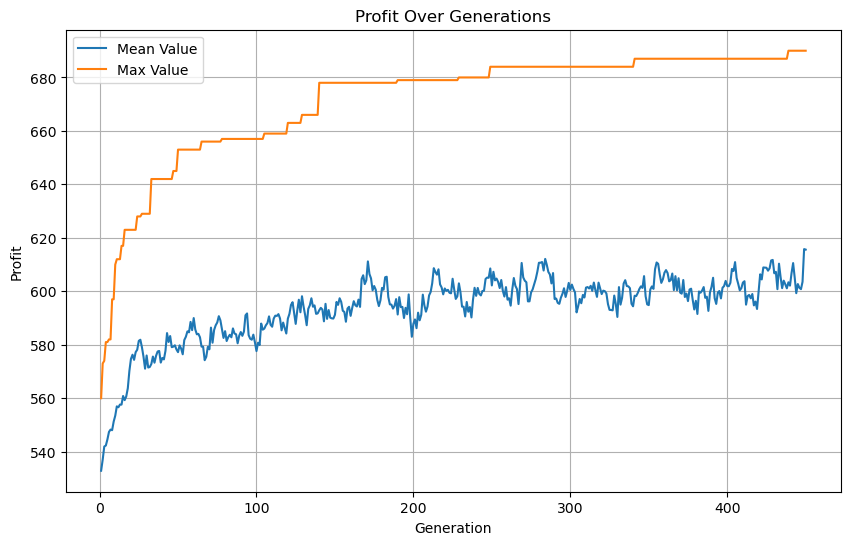

In [124]:
import matplotlib.pyplot as plt

gene = list(range(1, len(result[1][0]) + 1))
plt.figure(figsize=(10, 6))
plt.plot(gene, result[1][0], label="Mean Value")
plt.plot(gene, result[1][1], label="Max Value")

plt.xlabel("Generation")
plt.ylabel("Profit")
plt.title("Profit Over Generations")
plt.legend()
plt.grid(True)

plt.show()

The conversion is steady and we reach a good acceptable result comapred to the Greedy approach: 696. 
The speed of the solution is also a very good aspect as we get good results in much less time than DFS. 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">How about CSP?</h4>
</div>

#### Simple Backtracking slow
Simple backtracking works and leads to an optimal solution. However, **it is very slow**. We tought about trying to make it faster and more efficient using Forward checking or Arc Consistency. However these are **not suitable** for our problem and here is why:

#### Forward checking not useful: 
Since the backtracking **algorithm explicitly skips positions occupied by a biscuit**, forward checking adds no significant pruning. We are already ensuring that no overlap or invalid placement happens dynamically. Also, leaving a position empty is always an option (-1), **there will always be a valid assignment**. This means forward checking won’t identify "inconsistent" states where no value can be assigned.

#### Arc Consistency (AC-3) not a good fit here: 
In typical CSP problems, variables are interdependent, meaning that the value of one variable directly affects the possible values of another. Here, **positions on the dough roll are mostly independent** except for overlap and defect constraints, which are already **dynamically checked.**

#### Constraints respecting not enough:
We not only want to find a configuration that is acceptable, **we are looking for an optimal or near optimal solution**. So everytime csp land on a correct solution, the profit will be stored and we will backtrack to find better solutions. This is exactly what we did with DFS. 


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Overall Conclusion</h2>
</div>

The nature of the problem posed a significant challenge as it combined constraints and maximization, making it difficult to directly see a clear solution. To address the problem, we explored two main approaches:

1. Finding the Optimal Solution: Using Depth-First Search (DFS), we aimed to explore all possible configurations to ensure the best possible outcome. However, while DFS guarantees the optimal solution, it was computationally expensive and time consuming. On our devices, running DFS for the real dough size was impractical due to its extensive runtime.

2. Finding a Near-Optimal Solution(quickly): To tackle the problem efficiently, we implemented a Genetic Algorithm. The GA provided a fast and practical way to approximate a solution and we were able to converge toward high-quality results.

To evaluate the performance of these approaches, we compared them against a baseline greedy algorithm. This comparison highlighted the strengths and trade-offs of each method. DFS produced the best results (higher than greedy), confirming its ability to find the optimal solution. GA allowed a balance between speed and quality, making it a viable choice for cases where efficiency is a priority.

The choice of algorithm depends on the needs of the situation:
- If time and memory are not a problem and less important than achieving the best solution, DFS is the preferred method.
- If efficiency and practicality are more important, GA offers a fast and good approximation.
 
This project shows the importance of aligning algorithm choice with problem requirements and resource constraints.